to-do:
1. Go over analytics vidhya article

<img src = '../../sb_tight.png'>
<h1 align = 'center'> Capstone Project 2: Pump It Up </h1>

---

### Notebook 2: EDA (Exploratory Data Analysis)
**Author:<br>
Tashi T. Gurung**<br>
**hseb.tashi@gmail.com**

### About the project:
The **objective** of this project is to **predict the failure of water points** spread accross Tanzania before they occur.

50% of Tanzania's population do not have access to safe water. Among other sources, Tanzanians depend on water points mostly pumps (~60K) spread across Tanzania. Compared to other infrastructure projects, water point projects consist of a huge number of inspection points that are geographically spread out. Gathering data on the condition of these pumps has been a challenge. From working with local agencies, to implementing mobile based crowd sourcing projects, none have produced satisfactory results.

The lack of quality data creates a number of problem for a stakeholder like the Tanzanian Government, specifically the Ministry of Water. Consequences include not only higher maintainence costs, but also all the problems and nuanced issues faced by communities when their access to water is compromised or threatened.

While better data collection infrastructure should be built overtime, this project (with its model(s), various analysis, and insights) will be key for efficient resource allocation to maximize the number of people and communities with access to water.
In the long run, it will assist stake holders in and project planning, and even local, regional and national level policy formation. 

### About the notebook:
* Performed EDA on the features under two sections based on their data type i.e. categorical or numerical <br>
* Consolidated the target variable category  'needs repair' with 'non-functional', essentially reducing the problem from a <br>
multi-class classification to binary classification <br>
* Represented target variable values as 1s and 0s where 1 represents 'functional', and 0 represents 'non-functional'. <br>
* Primarly focused on bar charts and historgrams
* Reduced some features with high cardinality to binary, and significanlty reduced the cardinality of others, with the goal to perform EDA

---

<a id = 'toc'> <h2> Table of Contents </h2> </a>
<ul>
    <li> <a href = '#lnd'> Import libraries and datasets </a></li>
    <li> <a href = '#peda'> Preliminary EDA </a> 
    <li> <a href = '#eda'> EDA: Categorical Features </a>   
        <ul>
            <li> <a href = '#viz'> Visualizations    </a>
                <ol>
                    <li><a href = '#feature 1'> subvillage </a></li>
                    <li><a href = '#feature 2'> installer </a></li>
                    <li><a href = '#feature 3'> scheme name </a></li>
                    <li><a href = '#feature 4'> funder </a></li>
                    <li><a href = '#feature 5'> ward </a></li>       
                </ol>
            </li> 
            <li><a href = 'lcf'> Low Cardinality Features </a> </li>
            <li> <a href = '#aeda'> Additional EDA </a> </li> 
        </ul>
    </li>
    <li> <a href = '#edanum'> EDA: Numerical Features </a> 
    </li>
    <li> <a href = '#summary'> Summary </a> 
    </li>
</ul>

---

<a id = 'lnd'> <h2> Import Libraries and Datasets </h2></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import seaborn as sns

In [2]:
df = pd.read_csv('../data/interim/df.csv')

---

<a id = 'peda'><h3> Preliminary EDA </h3> </a>

Look at the counts of each data type

In [3]:
df.dtypes.value_counts()

object     30
int64       6
float64     3
dtype: int64

Columns with missing values

In [4]:
s = df.isna().sum()
s_m = s[s>0]/len(df)
s_m = s_m.sort_values(ascending = False)

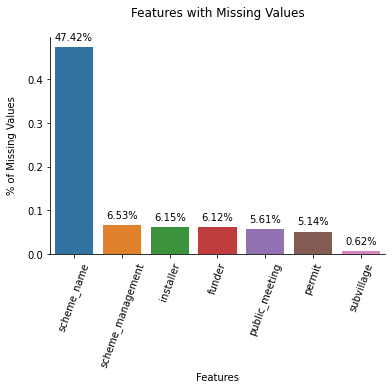

In [5]:
fig, ax = plt.subplots()

_ = sns.barplot(x = s_m.index, y = s_m.values,
                ax = ax)

for bar in _.patches:
    _.annotate(f'{(round(bar.get_height()*100,2))}%',    # annotation text
                   (bar.get_x() + bar.get_width() / 2,  # X co-ordinate
                    bar.get_height()),              # Y co-ordinate
                   ha='center', va='center',            # text alignment 
                   size=10,            # text font
                   xytext=(0, 10),                       
                   textcoords='offset points')

    
ax.set_title('Features with Missing Values',
             pad = 20)

ax.set_xlabel('Features')
ax.set_ylabel('% of Missing Values',
              labelpad = 10)    

plt.xticks(rotation = 70)
sns.despine();

**Target Variable**

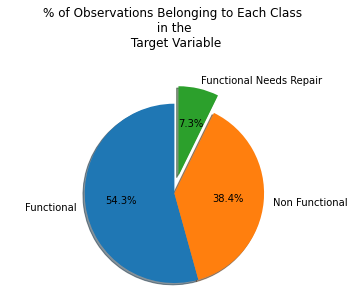

In [6]:
s = df['target_var'].value_counts()/len(df)

fig, ax = plt.subplots()

ax.pie(s.values, labels=s.index.str.title(), 
       autopct='%1.1f%%',
       explode = (0,0,0.2),
       shadow=True, startangle=90)

ax.set_title('% of Observations Belonging to Each Class \n in the \n Target Variable',
             pad = 30)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  ;

**Comments:**<br>
There is a significant class misbalance in the target variable

---

<a id = 'eda'><h1> EDA: Categorical Variables </h1></a>

Primary Resource Consulted for this portion of EDA:\
Medium/Analytics Vidhya\
https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55

Some categorical variables have datatype int.\
Let us convert them to their correct datatype i.e. string

In [7]:
# convert datatype of cols from int to str
cols = ['id','region_code','district_code',]
for col in cols:
    df[col] = df[col].astype('str')

In [8]:
# filter for only categorical features
df_cat = df.select_dtypes(include=object).copy()

df_cat.drop(columns  = ['id','wpt_name'], inplace = True)
# CONCAT 
# -> first row, and 
# -> nunique() of each column

df_cat = pd.concat([df_cat.iloc[0].T,df_cat.nunique(), df_cat.isna().sum()/len(df_cat)], 
          axis = 1, 
          keys = ['e.g. row1','nunique()', 'missing_value %'])
df_cat.sort_values(by = 'nunique()', ascending = False)

,e.g. row1,nunique(),missing_value %
subvillage,Mnyusi B,19287,0.006246
scheme_name,Roman,2696,0.474175
installer,Roman,2145,0.061532
ward,Mundindi,2092,0.000000
funder,Roman,1897,0.061195
date_recorded,2011-03-14,356,0.000000
lga,Ludewa,125,0.000000
region_code,11,27,0.000000
region,Iringa,21,0.000000
district_code,5,20,0.000000


---

For EDA's that follow, let us temporarity convert the target_variable to a numeric datatype with 2 classes instead of 3

In [9]:
df['target_var'] = df['target_var'].map({'functional':1,
                                         'non functional':0,
                                         'functional needs repair':0})

---

In [10]:
def feature_vs_target_series(feature_name):
    return df.groupby(feature_name)['target_var'].mean().std()

List of Categorical Features

In [11]:
columns = df_cat.index
columns = columns.drop(['date_recorded',
                        'recorded_by', # only 1 category i.e.GeoData Consultants Ltd
                        'target_var'])

standard deviation of the mean within each category of the different features

In [12]:
std_series = pd.Series(dtype = 'float')
for column in columns:
    std_series[column]=feature_vs_target_series(column)

nunique() for each feature

In [13]:
nunique_series = pd.Series(dtype = 'float')
for index in std_series.sort_values(ascending = False).index:
    nunique_series[index]= df[index].nunique()

Combine the above two series

In [14]:
f_df = pd.concat([std_series, nunique_series], axis = 1)
f_df.columns = ['std()', 'nunique()']
f_df.sort_values(by = 'std()', ascending = False)

,std(),nunique()
subvillage,0.436019,19287
installer,0.428051,2145
scheme_name,0.417182,2696
funder,0.416414,1897
ward,0.268878,2092
quantity,0.257967,5
waterpoint_type_group,0.251232,6
waterpoint_type,0.247132,7
quality_group,0.193018,6
region_code,0.192321,27


<a href = '#toc'> Back to Table of Contents </a>

---

<h2> <a id = 'viz'> Visualizations </a> </h2>

A function to create **bar charts** to perform EDA on categorical variables

In [15]:
def feature_vs_target_barchart(feature_name):
    '''
    Function to create barcharts where,
    x is the different categories within a feature variable, and
    y is the likelyhood a pump is functional, solely based on that value of the feature variable
    '''
    s = round(df.groupby(feature_name)['target_var'].mean().sort_values(),2)
    s['Overall'] = df['target_var'].mean()
    
    fig, ax = plt.subplots(figsize = (10,8))

    _ = sns.barplot(x = s.index, y = s.values,
                    ax = ax)

    sns.despine()
    for bar in _.patches:
        _.annotate(f'{(int(bar.get_height()*100))}%',    # annotation text
                       (bar.get_x() + bar.get_width() / 2,  # X co-ordinate
                        bar.get_height()),              # Y co-ordinate
                       ha='center', va='center',            # text alignment 
                       size=10,            # text font
                       xytext=(0, 10),                       
                       textcoords='offset points')

    plt.ylabel('Likelihood of being Functional')
    plt.xlabel(feature_name)
    plt.title(f'{feature_name.title()} vs Target Variable')

    plt.xticks(rotation = 90)
    ;
    return (s)

---

<a id = 'feature 1'> 1. Feature: **subvillage** vs **target variable**</a>

In [16]:
df['subvillage'].value_counts()/len(df)

Madukani             0.008552
Shuleni              0.008519
Majengo              0.008451
Kati                 0.006279
Mtakuja              0.004411
                       ...   
Shibui               0.000017
Mkorin'Ga            0.000017
Lebosireti           0.000017
Nyamiguna            0.000017
Damwelu Magharibi    0.000017
Name: subvillage, Length: 19287, dtype: float64

We will skip subvillage for now, because it has high cardinality, <br>
and any single category doesn't stand out <br>
Found no basis yet, to reduce the cardinality

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'feature 2'> 2. Feature: **installer** vs **target variable**</a>

In [17]:
df['installer'].value_counts()/len(df)

DWE                           0.292963
Government                    0.030724
RWE                           0.020303
Commu                         0.017845
DANIDA                        0.017677
                                ...   
Quick win project /Council    0.000017
Nyabibuye Islamic center      0.000017
Shule ya msingi ufala         0.000017
Water Hu                      0.000017
Pentecost church              0.000017
Name: installer, Length: 2145, dtype: float64

DWE is the largest installer by volume (i.e. ~29%), followed by Government with only ~3% of the pumps installed.

**Question**:<br>
Are pumps installed by the largest installer, DWE more or less likely to be functional vs other installers?

In [18]:
df['installer_bool'] = np.where(df['installer'] == 'DWE', 'DWE', 'Non-DWE')

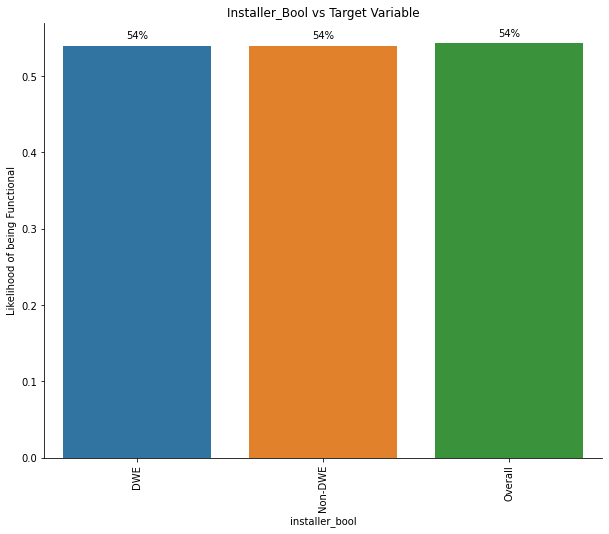

In [19]:
s = feature_vs_target_barchart('installer_bool')

In [20]:
s['DWE']/s['Non-DWE']

1.0

**Comments:** <br>
Whether water pumps are installed by DWE or Non-DWE has no significant correlation with it's status

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'feature 3'> 3. Feature: **scheme_name** vs **target variable**</a>

In [21]:
(df['scheme_name'].value_counts()/len(df))*100

K                        1.148148
None                     1.084175
Borehole                 0.919192
Chalinze wate            0.681818
M                        0.673401
                           ...   
BL Kilimasimba           0.001684
BUWADA                   0.001684
Chikombo water supply    0.001684
jongoj                   0.001684
Underground water sc     0.001684
Name: scheme_name, Length: 2696, dtype: float64

Cannot think of any way to reduce the cardinality of this feature variable

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'feature 4'> 4. Feature: **funder** vs **target variable**</a>

In [22]:
df['funder'].value_counts()/len(df)

Government Of Tanzania    0.152929
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
World Bank                0.022710
                            ...   
Nssf                      0.000017
Unhcr/government          0.000017
Kanis                     0.000017
Lgcd                      0.000017
Ded_rwsp                  0.000017
Name: funder, Length: 1897, dtype: float64

**Question**: <br>
Are pumps funded by the government more or less likely to be functional?

Let us create a new feature called 'funder_bool' where if funder  is 'Government of Tanzania' or 'Ministry of Water', value = 'govt', else 'non-govt'

In [23]:
df['funder_bool'] = np.where(df['funder'].isin(['Government Of Tanzania','Ministry Of Water']), 'govt', 'non-govt')

**Visualization**

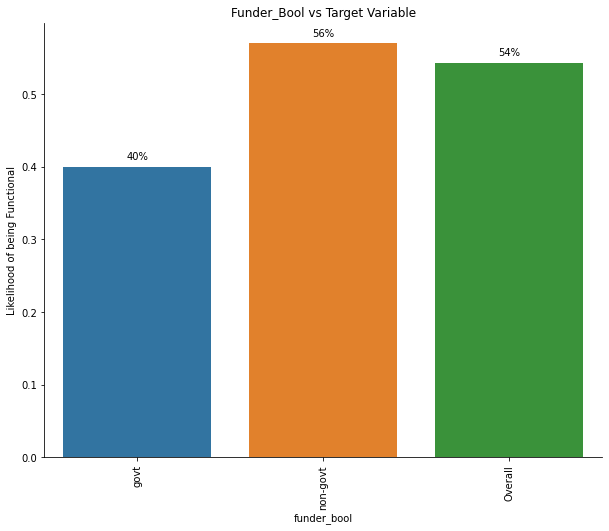

In [24]:
s = feature_vs_target_barchart('funder_bool')

In [25]:
round(57.01/40.44,2)

1.41

In [26]:
round(s['non-govt']/s['govt'],2)

1.42

**Comments**:<br>
Water pumps funded by the non-governmental organizations are ~41% more likely to be functional vs those funded by the government

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'feature 5'> 5. Feature: **ward** vs **target variable**</a>

In [27]:
df['ward'].value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Nsemulwa       1
Uchindile      1
Rasbura        1
Kapilula       1
Igogo          1
Name: ward, Length: 2092, dtype: int64

Cannot think of any way to reduce the cardinality of this feature variable

<a href = '#toc'> Back to Table of Contents </a>

---

<h2> <a id = 'lcf'> Low Cardinality Features </a> </h2>

In [28]:
lcf = nunique_series[5:]
lcf

quantity                   5
waterpoint_type_group      6
waterpoint_type            7
quality_group              6
region_code               27
scheme_management         12
district_code             20
extraction_type           18
water_quality              8
lga                      125
extraction_type_class      7
management                12
extraction_type_group     13
source                    10
payment                    7
payment_type               7
region                    21
basin                      9
public_meeting             2
management_group           5
source_type                7
permit                     2
source_class               3
dtype: int64

In [29]:
columns = lcf.index.to_list()
columns.remove('lga') # because of relatively higher cardinality i.e. 125 vs 2nd highest at 27

Create a bar chart for each of the 23 LCFs (Low Cardinality Features)

<ipython-input-15-9fbdf13b58cc>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (10,8))


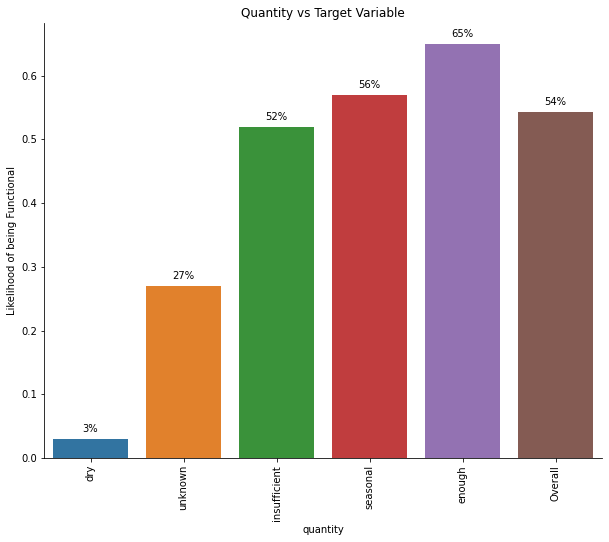

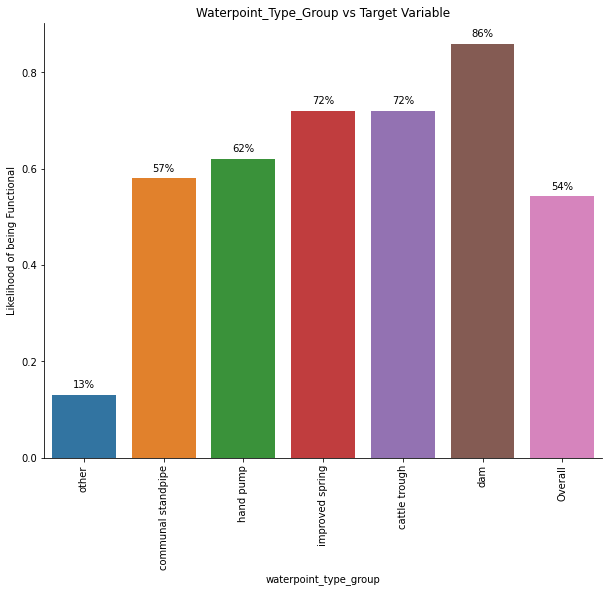

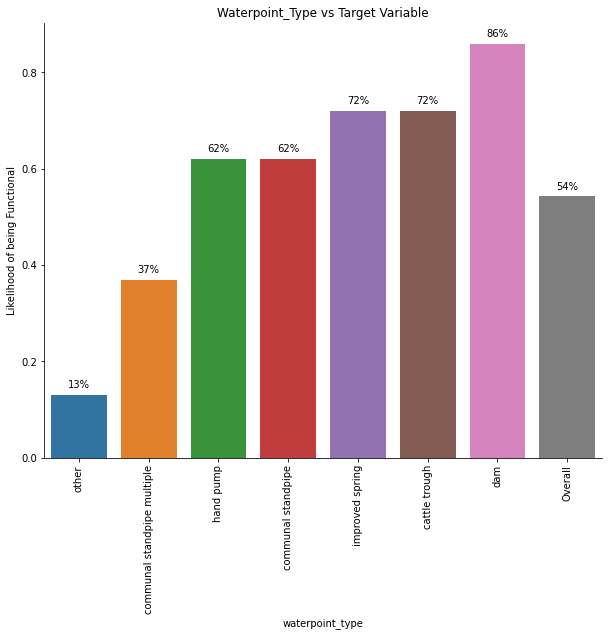

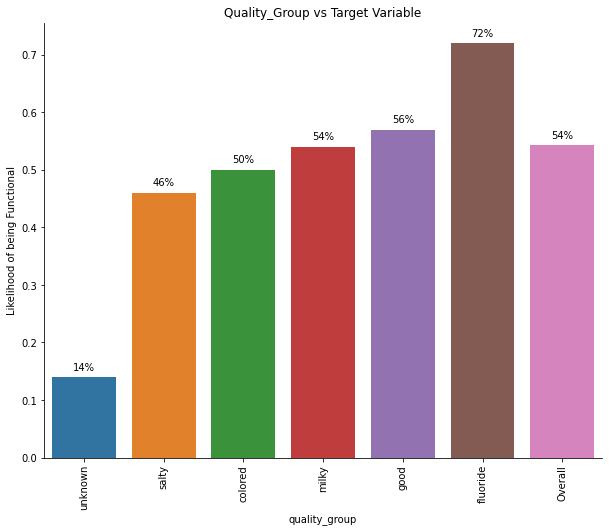

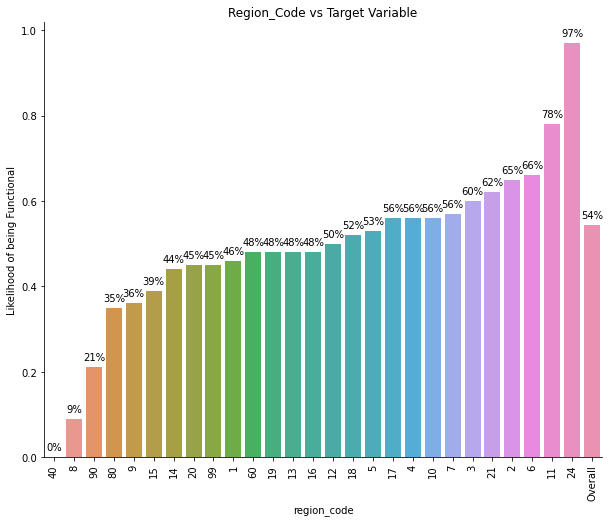

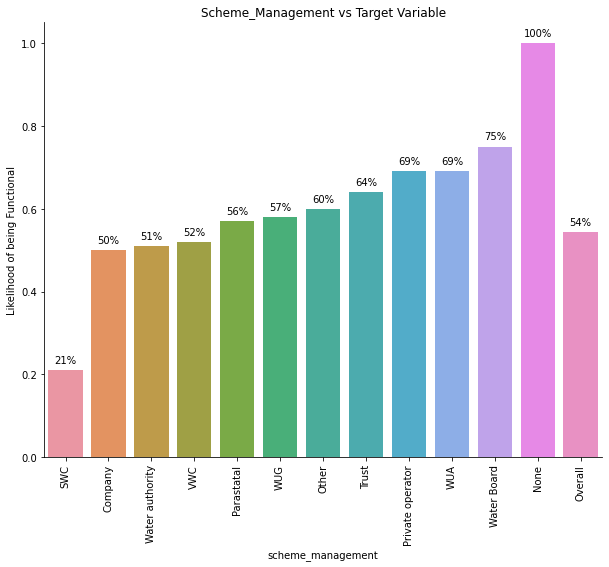

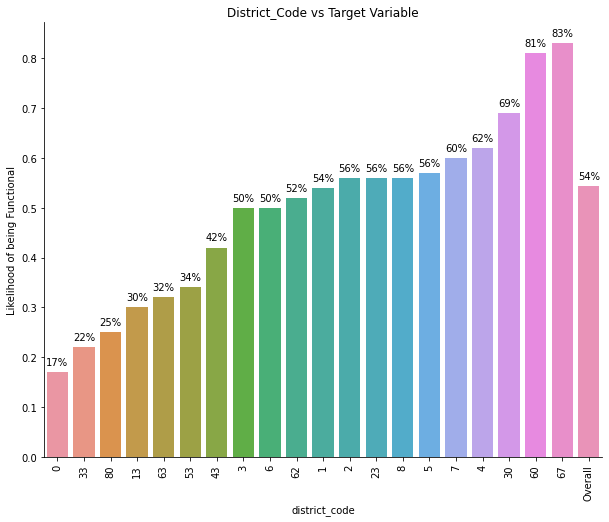

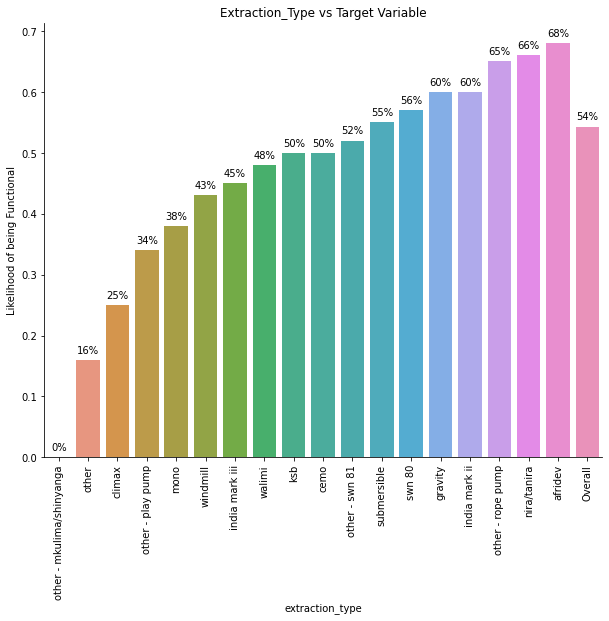

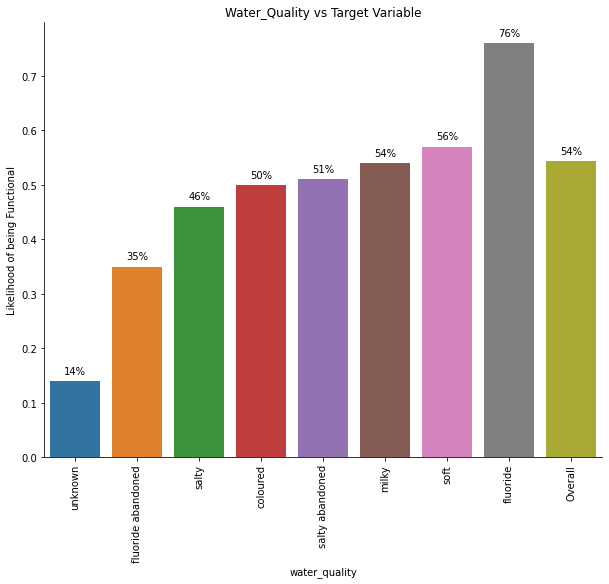

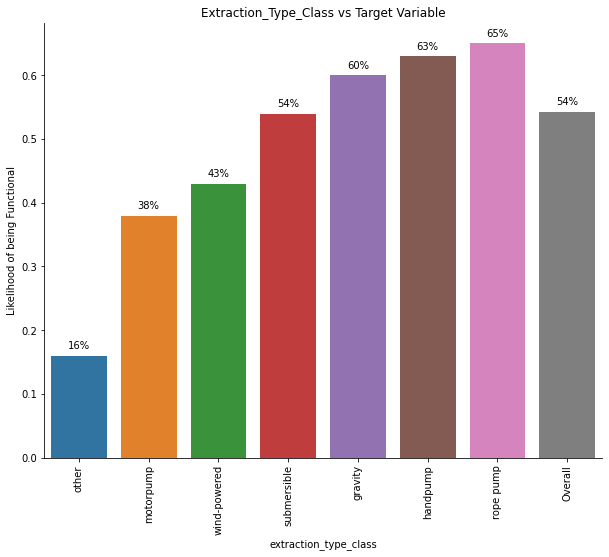

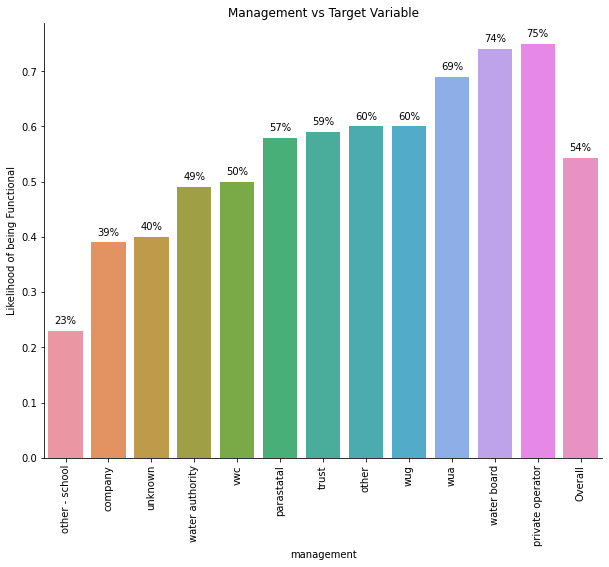

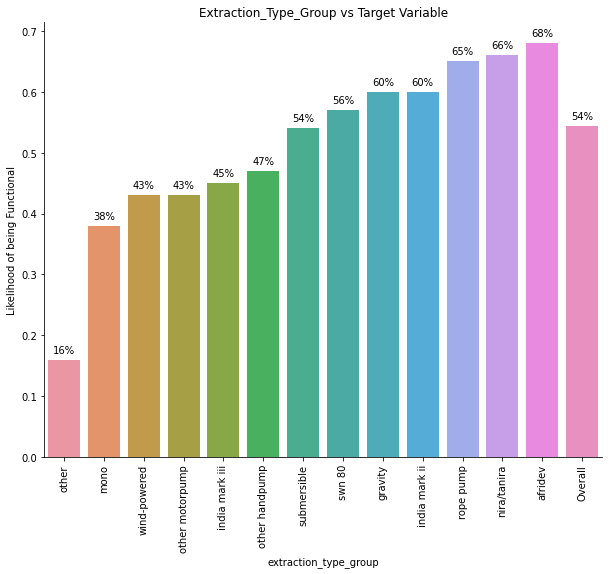

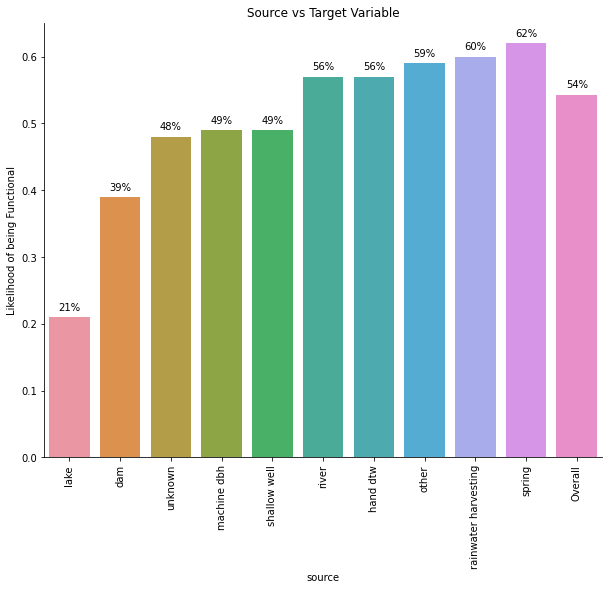

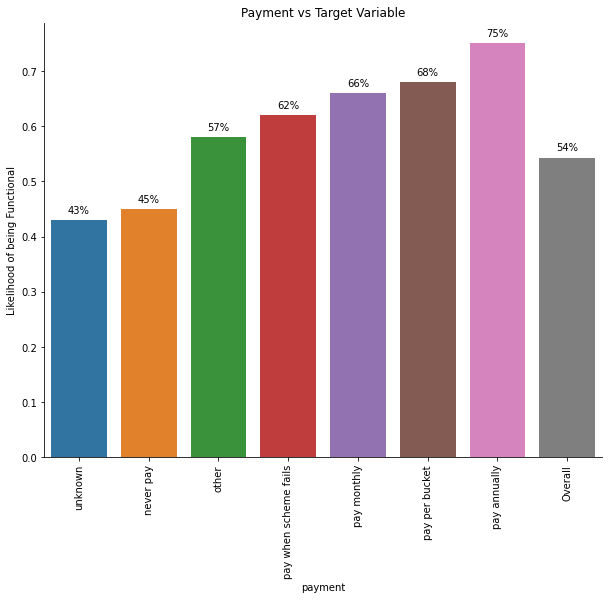

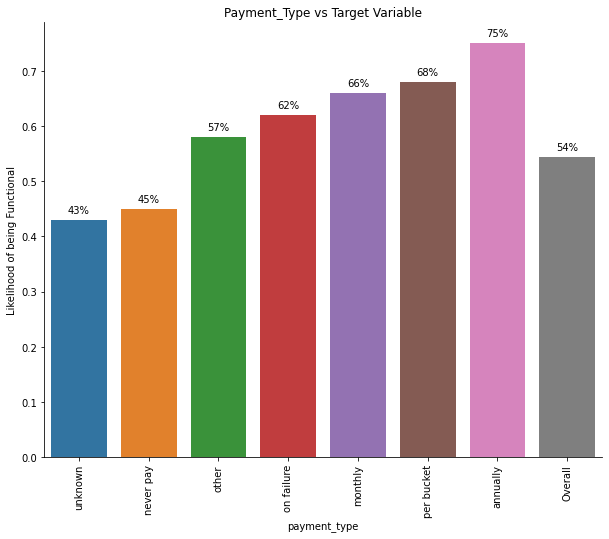

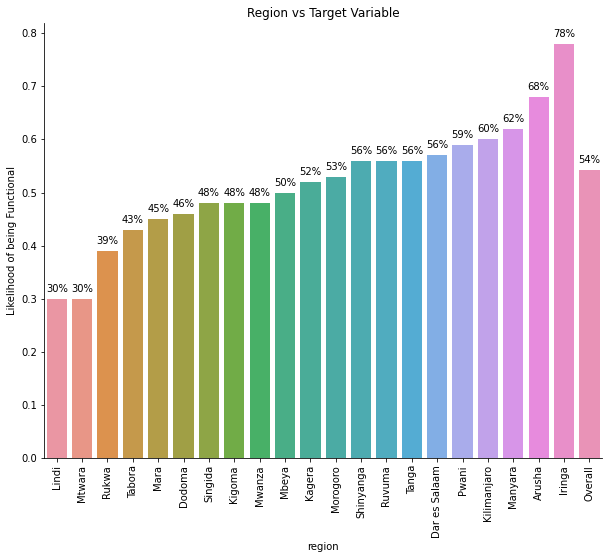

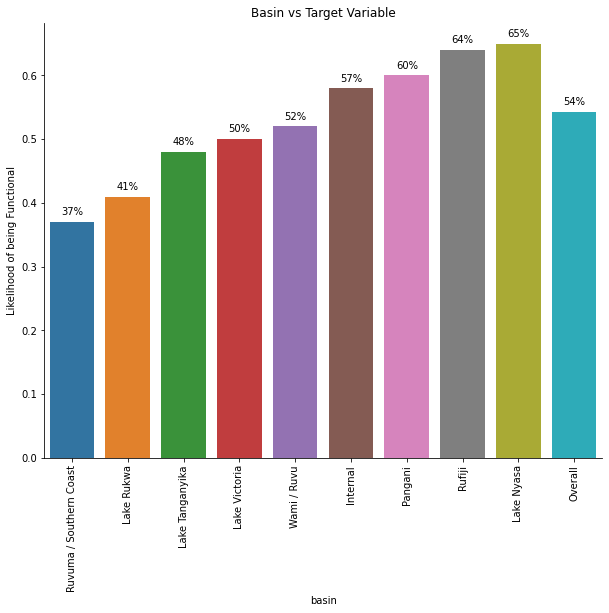

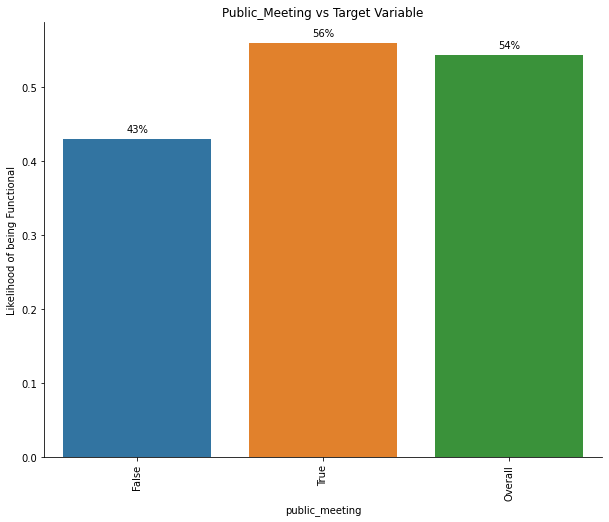

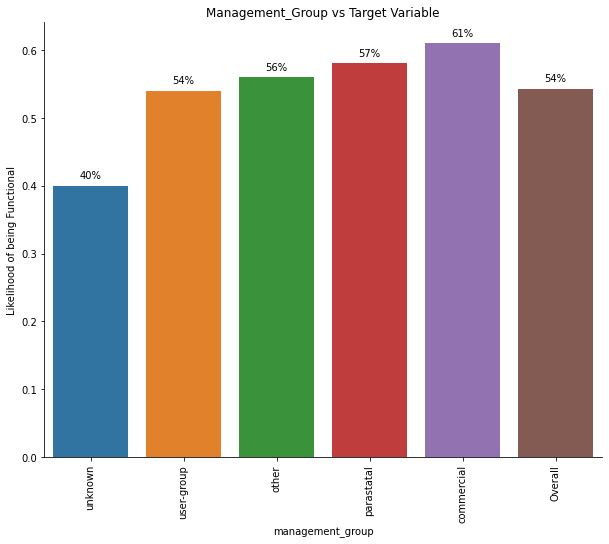

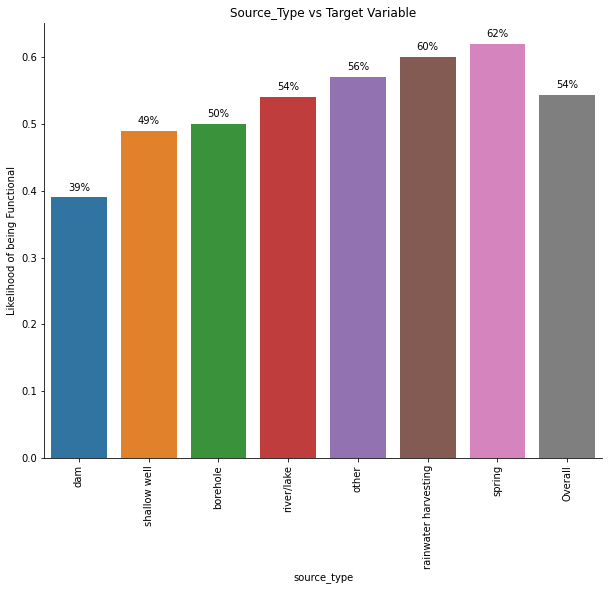

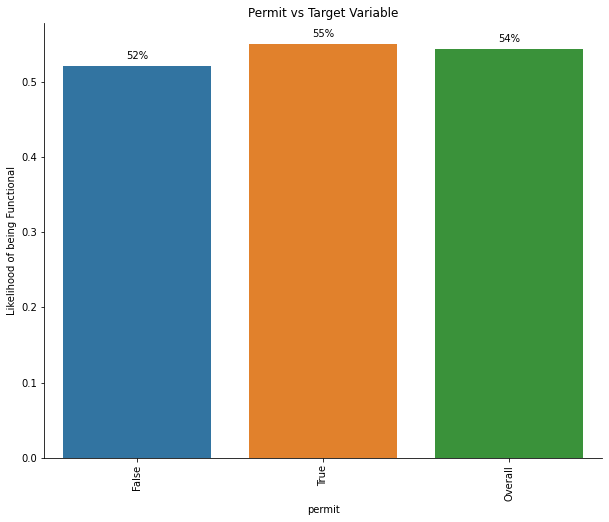

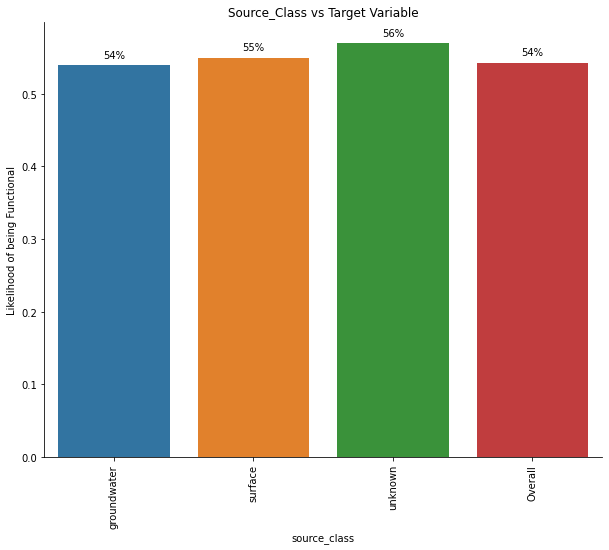

In [30]:
for column in columns:
    feature_vs_target_barchart(column)

**Comment**: <br>
Except <br>
feature: **'source_class'**, and feature **'permit'**, <br>
all other features seem to have a correlation with the target_variable

**Note:**<br>
Find a better way to visualize the 23 bar charts, OR <br>
Find a different way to perform EDA on these features

<a href = '#toc'> Back to Table of Contents </a>

---

<h2><a id = 'aeda'> Additional EDA </a></h2>

**Supplemental Question:**<br>
Do region_code and region have one to one relationship?

In [31]:
print(df['region'].nunique(), df['region_code'].nunique())

21 27


In [32]:
s = df.groupby('region')['region_code'].unique()
s

region
Arusha                [2, 24]
Dar es Salaam             [7]
Dodoma                    [1]
Iringa                   [11]
Kagera                   [18]
Kigoma                   [16]
Kilimanjaro               [3]
Lindi             [80, 18, 8]
Manyara                  [21]
Mara                     [20]
Mbeya                    [12]
Morogoro                  [5]
Mtwara            [90, 99, 9]
Mwanza               [19, 17]
Pwani             [60, 6, 40]
Rukwa                    [15]
Ruvuma                   [10]
Shinyanga        [17, 14, 11]
Singida                  [13]
Tabora                   [14]
Tanga                  [4, 5]
Name: region_code, dtype: object

**Comments:**<br>
No

In [33]:
# what conclusion can we reach here?
# Shoudln't each region have exacty 1 region_code?
# Why should this matter?
# -> Can we not just use feature: region and discard feature: region_code altogether?

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'edanum'> <h2> EDA: Numeric Variables </h2> </a>

In [34]:
df_num = df.select_dtypes(include=['float64','int64']).copy()
df_num.drop(columns = 'target_var', inplace = True) # drop the target variable
df_num.head(2)

,amount_tsh,gps_height,longitude,latitude,population,construction_year
0,6000.0,1390,34.938093,-9.856322,109,1999
1,0.0,1399,34.698766,-2.147466,280,2010


Take a look at the distrubtion of numerical features

In [35]:
df_num.describe()

,amount_tsh,gps_height,longitude,latitude,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,30500.000000,2013.000000


**Comments:**<br>
We can notice that most of the features are heavily skewed

---

**Skewness**

The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right.


In [36]:
df_num.skew(axis=None, skipna=None, level=None)

amount_tsh           57.807800
gps_height            0.462402
longitude            -4.191046
latitude             -0.152037
population           12.660714
construction_year    -0.634928
dtype: float64

**Comments:**<br>
'amount_tsh': total static head (amount of water available to waterpoint), and <br>
'population': population around the well <br>
are **heavily skewed to the right** <br>
i.e., most of the values lie on the lower/left side of the distribution

**Note:** <br>
Have to perform transformations on these variables in pre-processing phase

---

In [37]:
def num_histogram_by_target_var(feature):
    bool_mask_zero = df[feature] != 0
    bool_mask_functional = df['target_var'] == 1
    fig, ax = plt.subplots(figsize = (10,6))

    sns.histplot(df[bool_mask_zero & bool_mask_functional][feature], # green = 'functional'
                 color = 'g',
                 alpha = 0.3,
                 kde = True,
                 ax = ax)
    sns.histplot(df[bool_mask_zero & ~bool_mask_functional][feature], # red = 'not functional'
                 color = 'r', 
                 alpha = 0.3,
                 kde = True,
                 ax = ax)

    # Custom Legend
    legend_elements = [Patch(facecolor='r',
                             edgecolor='black',
                             alpha = 0.3,
                             label='Not Functional'),
                      Patch(facecolor='g',
                             edgecolor='black',
                             alpha = 0.3,
                             label='Functional')]
    ax.legend(handles=legend_elements, loc='best')

    sns.despine();

<h3> <a id = 'height'> gps_height </a></h3>

Altitude of the Well

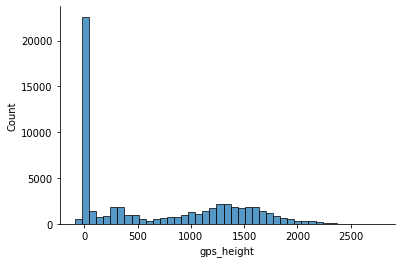

In [38]:
sns.histplot(df['gps_height'])
sns.despine();

34% of the value is 0

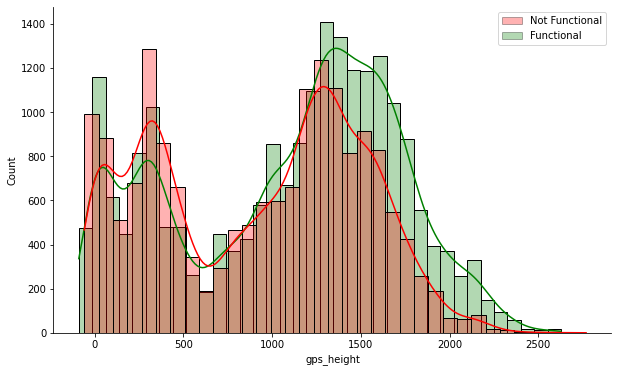

In [39]:
num_histogram_by_target_var('gps_height')

**Comments:** <br>
Pumps at a higher altitude seems to be more likely to be functional

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'cyear'> <h3> construction_year </h3> </a>

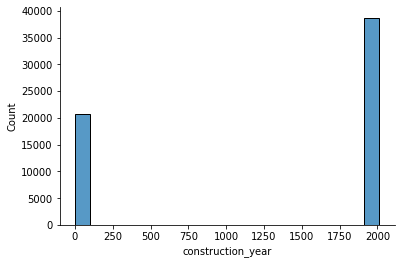

In [40]:
sns.histplot(df['construction_year'])
sns.despine();

~35% of the value is 0

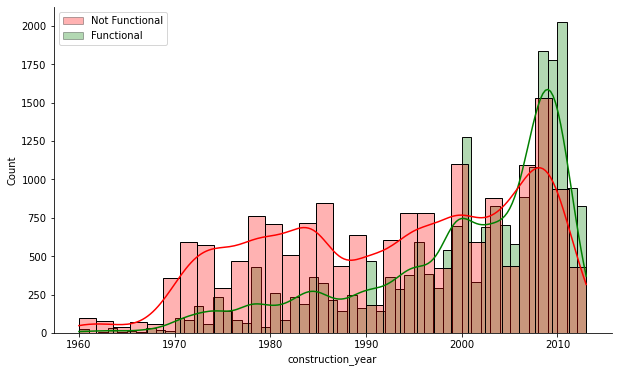

In [41]:
num_histogram_by_target_var('construction_year')

**Comments:**<br>
The water pumps build in later years are more likely to be functional in our dataset.<br>
Note: We also have to factor in the date a particular observation was recorded.

<a href = '#toc'> Back to Table of Contents </a>

---

**Date Recorded**

Since construction_year seems to be correlated with the target_var, we have to realize that the actual feature we are interested in is not the absolute year of construction, rather the age of the water pump. <br>
Hence, the date the data was recorded is essential. <br>

**Question:**<br>
Are the observations recorded over a wide period of years?

In [42]:
dr_by_day = df['date_recorded'].value_counts()
dr_by_day.index = pd.to_datetime(dr_by_day.index)
dr_by_year = dr_by_day.resample('Y').sum()

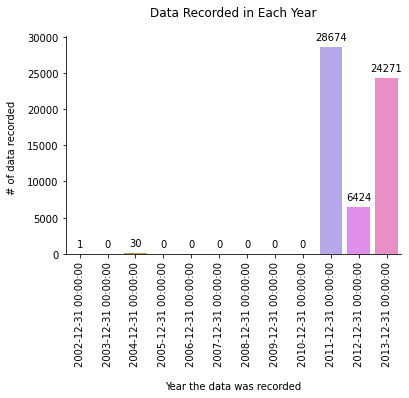

In [43]:
fig, ax  = plt.subplots()

_ = sns.barplot(x = dr_by_year.index, y = dr_by_year.values, ax = ax)

for bar in _.patches:
    _.annotate(f'{(int(bar.get_height()))}',    # annotation text
                   (bar.get_x() + bar.get_width() / 2,  # X co-ordinate
                    bar.get_height()),              # Y co-ordinate
                   ha='center', va='center',            # text alignment 
                   size=10,            # text font
                   xytext=(0, 10),                       
                   textcoords='offset points')

plt.xticks(rotation = 90)

ax.set_xlabel('Year the data was recorded',
              labelpad = 15)
ax.set_ylabel('# of data recorded ',
              labelpad = 10)
ax.set_title('Data Recorded in Each Year',
             pad = 20)


sns.despine();

**Comments:** <br>
Most of the data > 99% was recorded in the years of 2011 to 2013. <br>
However, there exists a miniscule number of observations recorded in 2002, and 2004

<a href = '#toc'> Back to Table of Contents </a>

---

<a id = 'corr'> <h2> Correlation Heatmap </h2> </a>

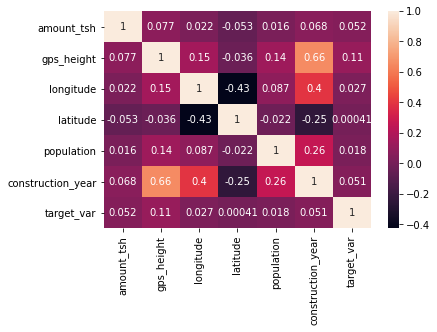

In [44]:
sns.heatmap(df.corr(),
            annot = True);

**gps_height vs construction_year**

In [45]:
zcy = df['construction_year'] !=0
zgh =  df['gps_height'] !=0
data = df[zcy & zgh]

In [46]:
color = np.where(data['target_var'] == 1, 'r', 'g')

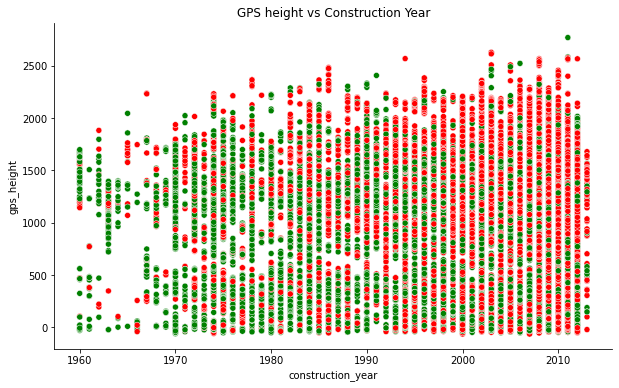

In [47]:
fig, ax = plt.subplots(figsize = (10,6))

sns.scatterplot(x = data['construction_year'], y = data['gps_height'],
                c = color, ax = ax)
ax.set_title('GPS height vs Construction Year')
sns.despine();

---

<a href = '#toc'> Back to Table of Contents </a>

Variables with colinearity

1. extraction_type, extraction_type_group, extraction_type_class

In [48]:
df[['extraction_type','extraction_type_group','extraction_type_class']].head()

,extraction_type,extraction_type_group,extraction_type_class
0,gravity,gravity,gravity
1,gravity,gravity,gravity
2,gravity,gravity,gravity
3,submersible,submersible,submersible
4,gravity,gravity,gravity


et vs et_group

In [49]:
(df['extraction_type'] != df['extraction_type_group']).sum()

2469

In [67]:
(df['extraction_type'] != df['extraction_type_group']).sum()/len(df)

0.04156565656565656

et vs et_class

In [66]:
(df['extraction_type'] != df['extraction_type_class']).sum()

21426

In [68]:
(df['extraction_type'] != df['extraction_type_class']).sum()/len(df)

0.3607070707070707

In [51]:
temp_df = df[df['extraction_type'] != df['extraction_type_class']][['extraction_type','extraction_type_class']]
print(temp_df['extraction_type'].value_counts())
print('')
print(temp_df['extraction_type_class'].value_counts())

nira/tanira                  8154
swn 80                       3670
mono                         2865
india mark ii                2400
afridev                      1770
ksb                          1415
other - rope pump             451
other - swn 81                229
windmill                      117
india mark iii                 98
cemo                           90
other - play pump              85
walimi                         48
climax                         32
other - mkulima/shinyanga       2
Name: extraction_type, dtype: int64

handpump        16456
motorpump        2987
submersible      1415
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64


**Comments**<br>
ksb = submersible 1,415 <br>
other - rope pump = rope pump 451 <br>
windmill = wind-powered 117 <br>
The rest are either hand pump or motor pump 16,456 + 2,987<br>
<br>
Recommendation: Use extraction_type since it has more granular data.

2. payment, payment_type

In [52]:
(df['payment'] != df['payment_type']).sum()/len(df)

0.4181986531986532

In [53]:
temp_df = df[df['payment'] != df['payment_type']][['payment','payment_type']].head(10)
print(temp_df['payment'].value_counts())
print('')
print(temp_df['payment_type'].value_counts())

pay monthly              4
pay per bucket           2
pay when scheme fails    2
pay annually             2
Name: payment, dtype: int64

monthly       4
annually      2
per bucket    2
on failure    2
Name: payment_type, dtype: int64


**Comments:**<br>
One to one relationship

3. water_quality, quality_group

In [54]:
(df['water_quality'] != df['quality_group']).sum()/len(df)

0.8697643097643097

In [55]:
temp_df = df[df['water_quality'] != df['quality_group']][['water_quality','quality_group']]
print(temp_df['water_quality'].value_counts())
print('')
print(temp_df['quality_group'].value_counts())

soft                  50818
coloured                490
salty abandoned         339
fluoride abandoned       17
Name: water_quality, dtype: int64

good        50818
colored       490
salty         339
fluoride       17
Name: quality_group, dtype: int64


**Comments:**<br>
One to one relationship

4. source, source_class


In [56]:
temp_df = df[df['source'] != df['source_class']][['source','source_class']]
print(temp_df['source'].value_counts())
print('')
print(temp_df['source_class'].value_counts())

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
Name: source, dtype: int64

groundwater    45794
surface        13328
unknown          212
Name: source_class, dtype: int64


**Comments**:
We can drop *source_class*

5. waterpoint_type, waterpoint_type_group

In [57]:
temp_df = df[df['waterpoint_type'] != df['waterpoint_type_group']][['waterpoint_type','waterpoint_type_group']]
print(temp_df['waterpoint_type'].value_counts())
print('')
print(temp_df['waterpoint_type_group'].value_counts())

communal standpipe multiple    6103
Name: waterpoint_type, dtype: int64

communal standpipe    6103
Name: waterpoint_type_group, dtype: int64


**Comments:**
One to one relationship between 'communal standpipe multiple' and 'communal standpipe'

6. subvillage, region, district_code, lga, ward

In [58]:
df[['region','lga','ward','subvillage']].nunique()

region           21
lga             125
ward           2092
subvillage    19287
dtype: int64

In [59]:
df.groupby(['region','lga','ward','subvillage'])['target_var'].mean()

region  lga           ward     subvillage
Arusha  Arusha Rural  Bangata  Engikaleti    0.736842
                               Gwasei        0.000000
                               Kwaniche      0.400000
                               Lobolosi      0.000000
                               Ndukenyi      1.000000
                                               ...   
Tanga   Tanga         Tongoni  Mundura       0.000000
                               Mwarongo      0.333333
                               Tambarani     0.000000
                               Tambarare     0.000000
                               Tongoni       0.000000
Name: target_var, Length: 27481, dtype: float64

Try to visualize this using circlify

<h2> Features with high number of 0 values </h2>

In [60]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

for col in df.select_dtypes(include=numerics).columns:
    print(col)
    print(round(df[col].value_counts(normalize= True).iloc[0] #assuming 0 and 0.0 are the first (0th) element
                *100,2), 
                f'% of {col} values is 0')

amount_tsh
70.1 % of amount_tsh values is 0
gps_height
34.41 % of gps_height values is 0
longitude
3.05 % of longitude values is 0
latitude
3.05 % of latitude values is 0
population
35.99 % of population values is 0
construction_year
34.86 % of construction_year values is 0
target_var
54.31 % of target_var values is 0


<h2> <a id = 'summary'> Summary </a> </h2>


* region_code and region do not have 1 to 1 relationship for all values
* The following numerical features have high skewness:
* -> amount_tsh: 57
* -> population: 13
* gps_height: Pumps at a higher altitude are more likely to be functional 
* construction_year: Newer Pumps are more likely to be functional
* date_recorded: >99% of the data was recorded between 2011 and 2013
* Except feature: **'source_class'**, and feature **'permit'**,
all other categorical features seem to have a correlation with the target_variable <br>
<br>
The following features look promising:
1. Age, (derived from construction_year and recorded_date)
2. gps_height
3. installer
4. quantity
5. water_quality
6. source
7. waterpoint_type


<a href = '#toc'> Back to Table of Contents </a>

<h1 align = center> END </h1>